In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class LinearRegression:
    def __init__(self, lr=0.05, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.loss_history = []

    def predict(self, X, w):
        return np.dot(X, w[1:]) + w[0]

    def loss(self, X, y, w):
        y_pred = self.predict(X, w)
        return np.mean((y_pred - y) ** 2)

    def grad(self, X, y, w):
        y_pred = self.predict(X, w)
        delta = y_pred - y
        grad_w = np.dot(X.T, delta) / X.shape[0]
        grad_b = np.sum(delta) / X.shape[0]
        grad_b = np.array([grad_b]).reshape(-1, 1)
        grad = np.concatenate((grad_b, grad_w))
        return grad.reshape(-1, 1)

    def fit(self, X_train, y_train):
        self.X_min = X_train.min(axis=0, keepdims=True)
        self.X_max = X_train.max(axis=0, keepdims=True)
        X_train_scaled = (X_train - self.X_min) / (self.X_max - self.X_min)
        self.y_mean = y_train.mean(axis=0, keepdims=True)
        self.y_std = y_train.std(axis=0, keepdims=True)
        y_train_scaled = (y_train - self.y_mean) / self.y_std

        self.w = np.zeros((X_train_scaled.shape[1] + 1, 1))
        self.loss_history =
        for epoch in range(self.epochs):
            l = self.loss(X_train_scaled, y_train_scaled, self.w)
            self.loss_history.append(l)
            dw = self.grad(X_train_scaled, y_train_scaled, self.w)
            self.w = self.w - self.lr * dw
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {l}")

    def predict_scaled(self, X):
        X_scaled = (X - self.X_min) / (self.X_max - self.X_min)
        y_pred_scaled = np.dot(X_scaled, self.w[1:]) + self.w[0]
        y_pred = y_pred_scaled * self.y_std + self.y_mean
        return y_pred

# Load data
data = pd.read_csv("50_Startups.csv")
X = data.iloc[:, [0, 1, 2]].values
y = data.iloc[:, -1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(lr=0.1, epochs=1000)
model.fit(X_train, y_train)

y_pred = model.predict_scaled(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

Epoch 0, Loss: 1.0
Epoch 100, Loss: 0.23731667648358523
Epoch 200, Loss: 0.09864487944845979
Epoch 300, Loss: 0.06720029328316716
Epoch 400, Loss: 0.05738392613578499
Epoch 500, Loss: 0.053162591694786876
Epoch 600, Loss: 0.05092239463623138
Epoch 700, Loss: 0.049581623604925365
Epoch 800, Loss: 0.04871495024514768
Epoch 900, Loss: 0.048122802758209376
RMSE: 9477.543305832385
MAE: 7690.190145567515
R2 Score: 0.8890779126746781


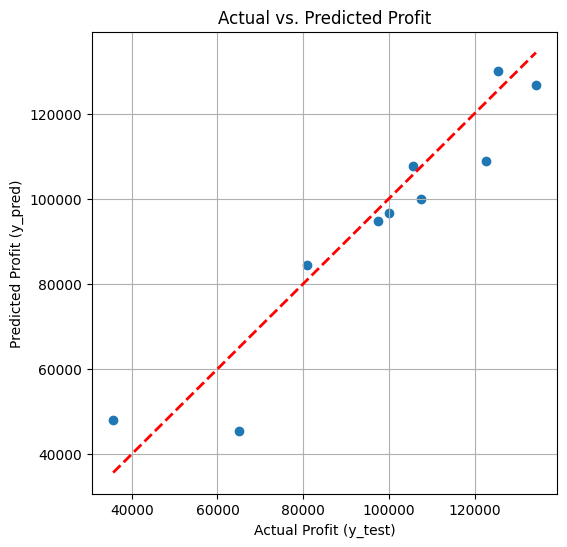

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Profit (y_test)")
plt.ylabel("Predicted Profit (y_pred)")
plt.title("Actual vs. Predicted Profit")
plt.grid(True)
plt.show()



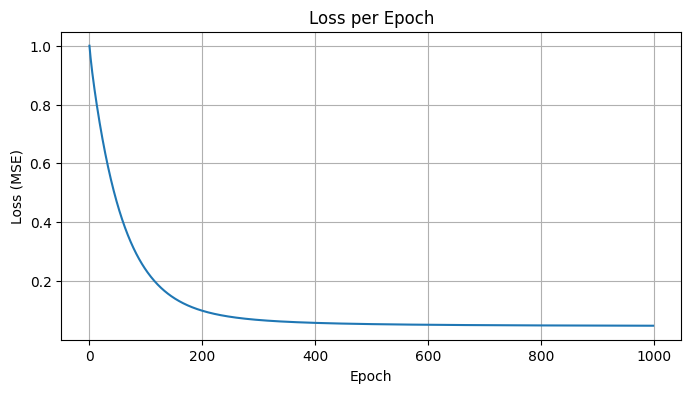

In [50]:
plt.figure(figsize=(8,4))
plt.plot(range(model.epochs), model.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Loss per Epoch")
plt.grid(True)
plt.show()
